# Data Preprocessing

## Importing

In [1]:
import pandas as pd
import numpy as np
import joblib
from feast import FeatureStore
from utils import *

/home/marcos/mle-specialization-02/mles2-env/lib/python3.11/site-packages/pydantic/_internal/_config.py:295: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)


## Loading and Cleaning

In [2]:
df_marketing_campaign_raw = pd.read_csv("../data/raw/new_marketing_campaign.csv")

/tmp/ipykernel_32798/3035702042.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_marketing_campaign_raw = pd.read_csv("../data/raw/new_marketing_campaign.csv")


In [3]:
df_marketing_campaign_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,e20d011e-c904-4301-871d-4120e734f189,1956,2n Cycle,Together,40831,0,1,2022-07-21,62,636,...,5,1,1,1,1,1,0,3,11,1.0
1,9038499f-e82e-43d3-803d-165dba9afe48,1950,Graduation,Together,22537,1,1,2021-11-05,42,6,...,4,0,1,1,0,0,0,3,11,1.0
2,a3aaaf2a-c063-45ba-ac1a-ab375d53faa3,1960,PhD,Together,195755,1,0,2015-12-24,28,383,...,4,0,1,0,1,1,0,3,11,1.0
3,fabc6e91-6e59-4dd6-8d07-572b7f07b9e4,1980,PhD,Divorced,143143,0,0,2017-06-14,24,29,...,5,1,1,0,0,0,0,3,11,1.0
4,6bf0b99f-dd6d-4964-a3ca-1e98f500d9e1,1977,Graduation,Married,84648,0,1,2021-06-17,92,133,...,7,1,1,1,1,1,0,3,11,0.0


In [4]:
df_marketing_campaign = df_marketing_campaign_raw.copy()

In [5]:
df_marketing_campaign.drop(DROP_FEATURES, axis=1, inplace=True)

In [6]:
"""
Dropping invalid rows
"""
df_marketing_campaign = dropping_invalid_year_birth_rows(dataframe=df_marketing_campaign)

Invalid rows dropped: 1


In [7]:
"""
Stripping object features
"""
df_marketing_campaign = stripping_object_features(dataframe=df_marketing_campaign)

Stripping the columns: ['Year_Birth', 'Education', 'Marital_Status', 'Teenhome', 'Dt_Customer']


In [8]:
"""
Casting numerical features
"""
df_marketing_campaign = casting_numerical_features(dataframe=df_marketing_campaign)

Casting to float type the columns: ['Year_Birth', 'Teenhome']


In [9]:
df_marketing_campaign.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1956.0,2n Cycle,Together,40831,0,1.0,2022-07-21,62,636,84,...,11,1,5,1,1,1,1,1,0,1.0
1,1950.0,Graduation,Together,22537,1,1.0,2021-11-05,42,6,2,...,2,3,4,0,1,1,0,0,0,1.0
2,1960.0,PhD,Together,195755,1,0.0,2015-12-24,28,383,51,...,2,9,4,0,1,0,1,1,0,1.0
3,1980.0,PhD,Divorced,143143,0,0.0,2017-06-14,24,29,0,...,2,5,5,1,1,0,0,0,0,1.0
4,1977.0,Graduation,Married,84648,0,1.0,2021-06-17,92,133,41,...,1,5,7,1,1,1,1,1,0,0.0


## Analyzing

In [10]:
df_marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336005 entries, 0 to 336005
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year_Birth           336005 non-null  float64
 1   Education            336005 non-null  object 
 2   Marital_Status       336005 non-null  object 
 3   Income               336005 non-null  int64  
 4   Kidhome              336005 non-null  int64  
 5   Teenhome             336005 non-null  float64
 6   Dt_Customer          336005 non-null  object 
 7   Recency              336005 non-null  int64  
 8   MntWines             336005 non-null  int64  
 9   MntFruits            336005 non-null  int64  
 10  MntMeatProducts      336005 non-null  int64  
 11  MntFishProducts      336005 non-null  int64  
 12  MntSweetProducts     336005 non-null  int64  
 13  MntGoldProds         336005 non-null  int64  
 14  NumDealsPurchases    336005 non-null  int64  
 15  NumWebPurchases      3

In [11]:
df_marketing_campaign.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000,...,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000,336005.000000
mean,1968.311597,81230.007187,0.441639,0.506966,48.687308,307.982009,26.586938,166.555489,40.894933,28.413759,...,2.953060,5.343203,4.924677,0.498513,0.500805,0.500778,0.500112,0.497930,0.009375,0.500016
std,12.323212,126181.662894,0.538449,0.545168,28.964752,333.526397,39.336879,225.632438,53.085555,40.434983,...,2.732365,3.599728,2.786381,0.499999,0.500000,0.500000,0.500001,0.499996,0.096369,0.500001
min,1888.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,3153.000000,0.000000,0.000000,24.000000,38.000000,3.000000,16.000000,8.000000,5.000000,...,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1969.000000,42861.000000,0.000000,0.000000,49.000000,176.000000,8.000000,66.000000,18.000000,10.000000,...,2.000000,5.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1977.000000,89945.000000,1.000000,1.000000,74.000000,499.000000,32.000000,232.000000,50.000000,34.000000,...,4.000000,8.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2000.000000,666662.000000,2.000000,2.000000,103.000000,1541.000000,203.000000,1731.000000,278.000000,272.000000,...,30.000000,15.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


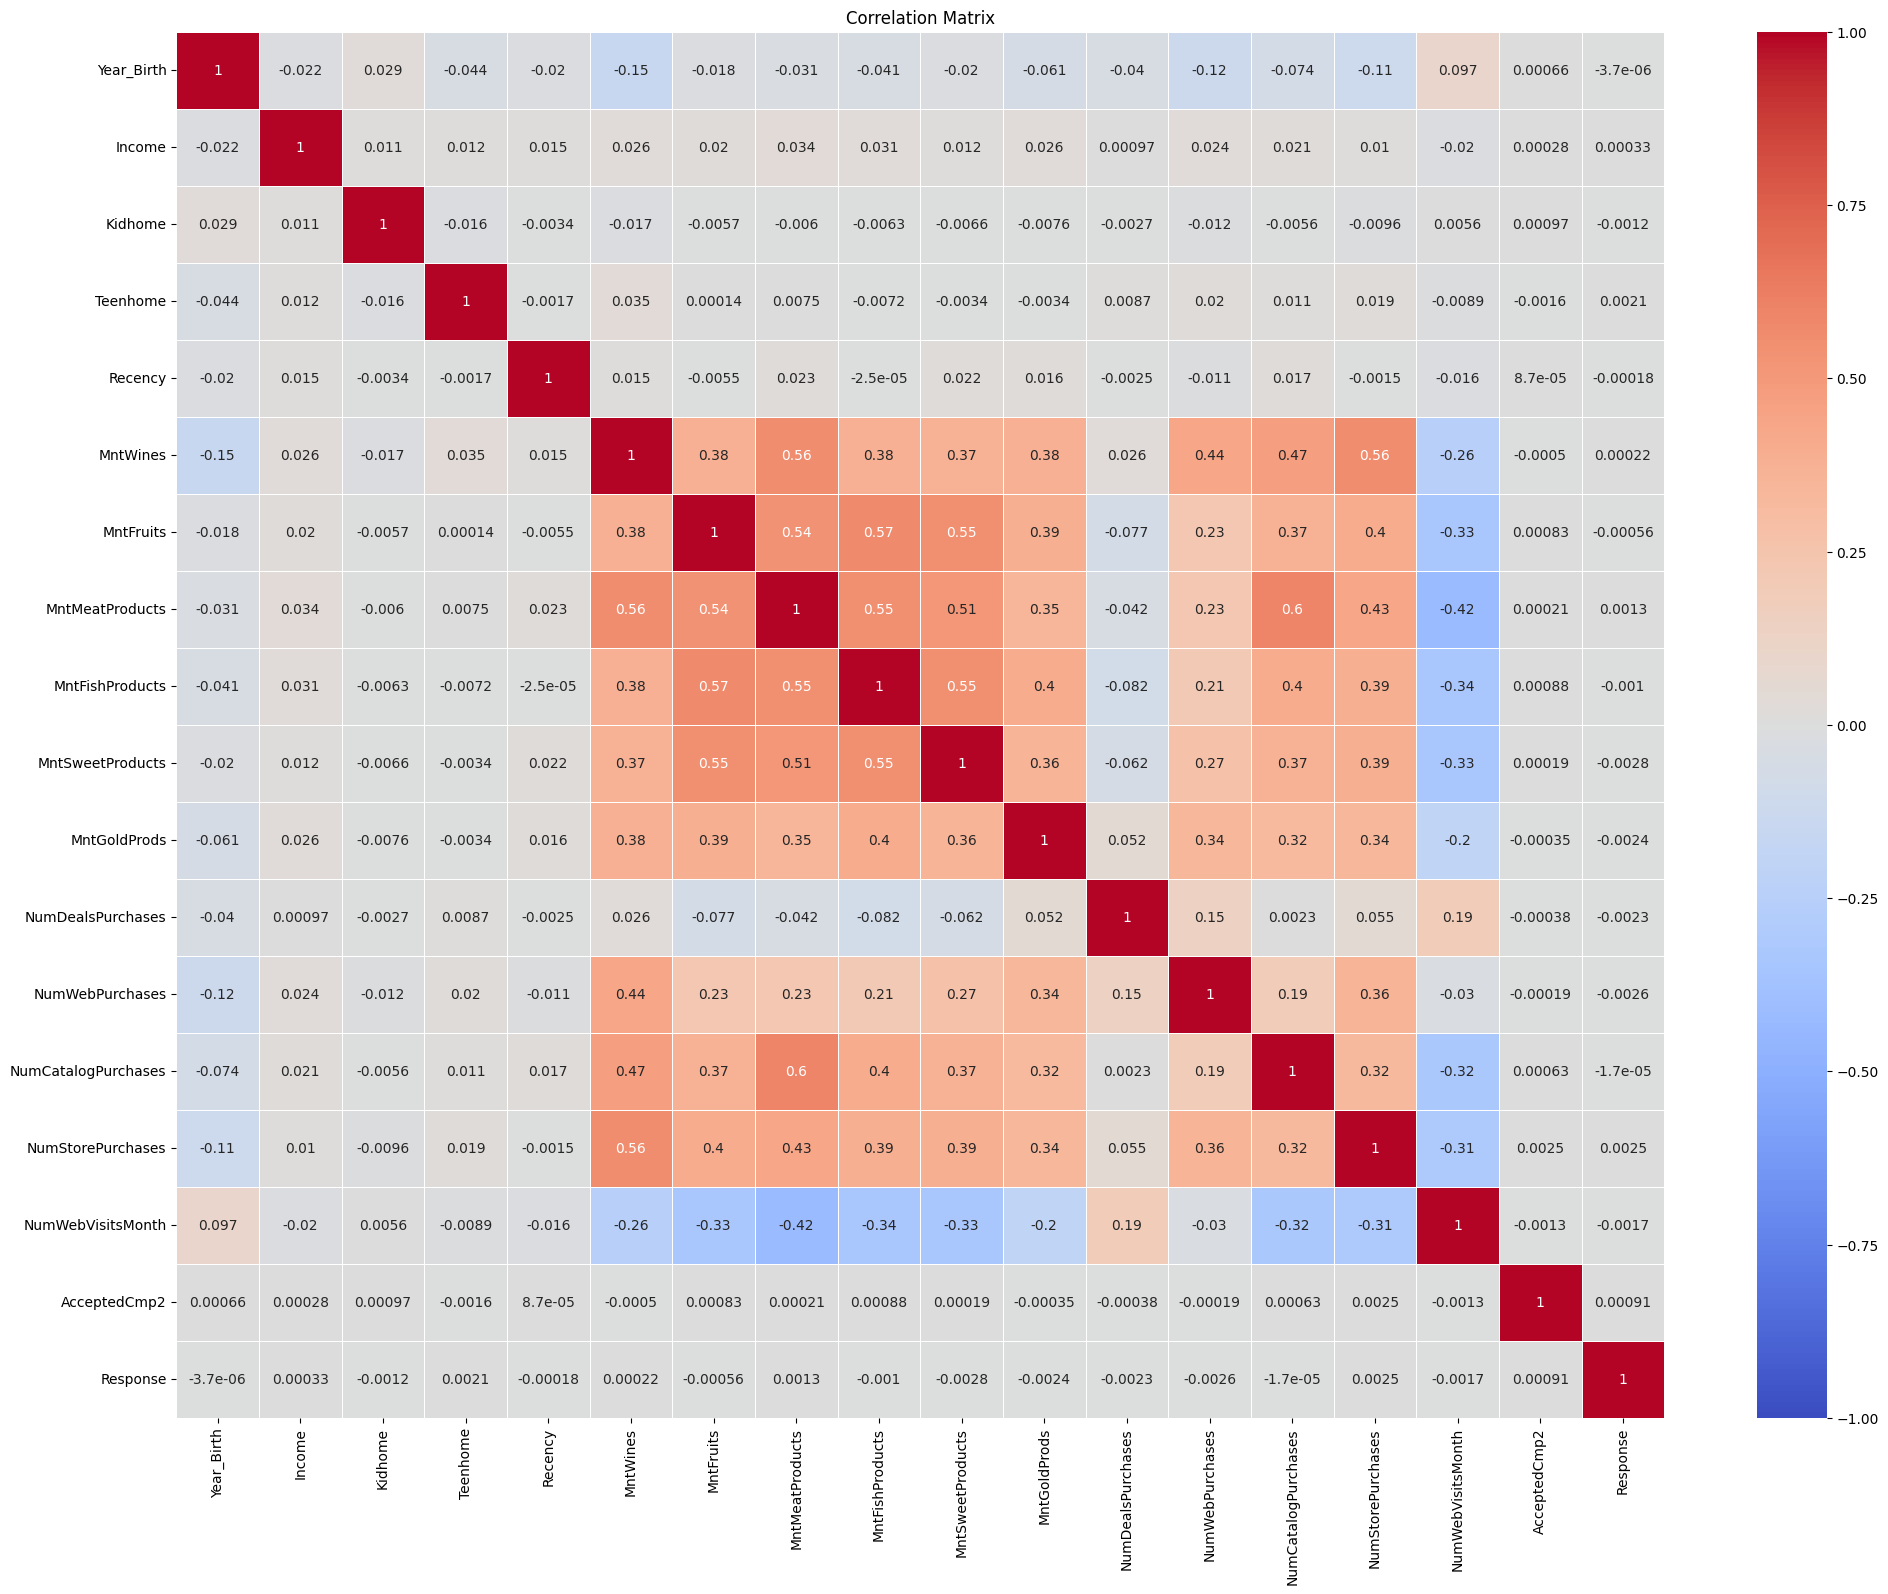

In [12]:
graphing_correlation_matrix(dataframe=df_marketing_campaign[INITIAL_NUMERICAL_FEATURES], zoom = 6)

array([[<Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>,
        <Axes: title={'center': 'Recency'}>],
       [<Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>],
       [<Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>],
       [<Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedCmp5'}>,
        <Axes: title={'center': 'Accepted

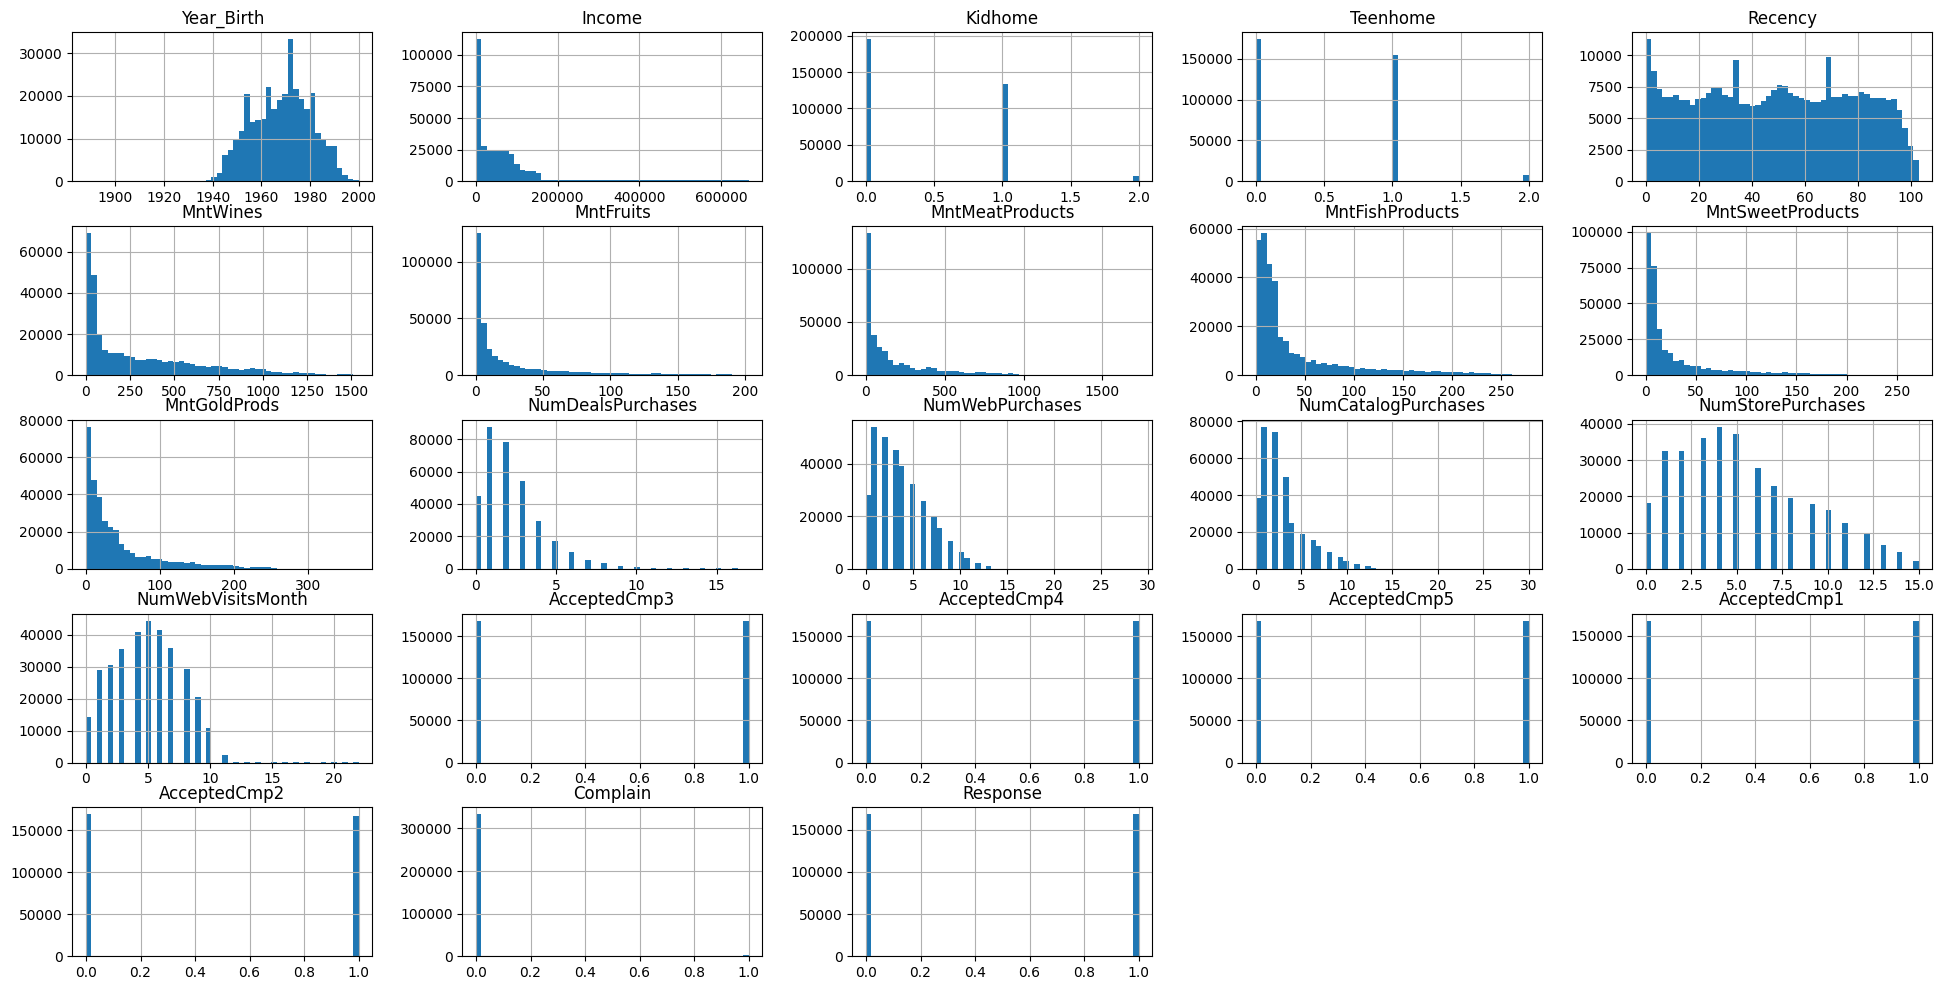

In [13]:
df_marketing_campaign.hist(bins=50, figsize=(24,12))

In [14]:
object_features_report(df_marketing_campaign)

********************Unique Counts********************
Education            5
Marital_Status       8
Dt_Customer       4059
dtype: int64

********************Unique Values********************
Feature 'Education': ['2n Cycle' 'Graduation' 'PhD' 'Master' 'Basic']
Feature 'Marital_Status': ['Together' 'Divorced' 'Married' 'Single' 'Widow' 'Absurd' 'YOLO' 'Alone']
Feature 'Dt_Customer': ['2022-07-21' '2021-11-05' '2015-12-24' ... '2012-08-30' '2012-08-26'
 '2012-08-25']

********************Value Counts********************
Feature 'Education' values: Education
Graduation    168590
PhD            73544
Master         57004
2n Cycle       30015
Basic           6852
Name: count, dtype: int64

Feature 'Marital_Status' values: Marital_Status
Married     127596
Together     83899
Single       70251
Divorced     34052
Widow        10025
Absurd        3480
Alone         3358
YOLO          3344
Name: count, dtype: int64

Feature 'Dt_Customer' values: Dt_Customer
2016-07-28    130
2017-12-03    127
2

## Splitting

In [15]:
"""
In this unsupervised learning use case we use all data for segmenting customers
"""
X_train, _, _, _ = split_dataset(target_feature=TARGET, dataframe=df_marketing_campaign, test_percentage=TEST_PERCENTAGE, seed=SEED, stratify_feature=STRATIFY_FEATURE)

X_train: (336005, 26)


## Feature Engineering

### Date Features

In [16]:
transforming_date_features(dataframe=X_train)

Column Year_Birth renamed to: Customer_Age
Column Dt_Customer renamed to: Customer_Tenure


In [17]:
X_train

,Customer_Age,Education,Marital_Status,Income,Kidhome,Teenhome,Customer_Tenure,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,67.0,2n Cycle,Together,40831,0,1.0,421,62,636,84,...,11,1,5,1,1,1,1,1,0,1.0
1,73.0,Graduation,Together,22537,1,1.0,679,42,6,2,...,2,3,4,0,1,1,0,0,0,1.0
2,63.0,PhD,Together,195755,1,0.0,2822,28,383,51,...,2,9,4,0,1,0,1,1,0,1.0
3,43.0,PhD,Divorced,143143,0,0.0,2284,24,29,0,...,2,5,5,1,1,0,0,0,0,1.0
4,46.0,Graduation,Married,84648,0,1.0,820,92,133,41,...,1,5,7,1,1,1,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336001,59.0,Graduation,Single,2784,0,1.0,3447,47,749,41,...,1,1,3,0,0,0,0,0,0,0.0
336002,81.0,Master,Married,88181,0,1.0,2818,58,445,0,...,1,4,7,0,1,0,1,0,0,0.0
336003,39.0,Graduation,Married,80874,0,1.0,2931,87,955,49,...,1,15,8,0,1,1,0,0,0,0.0
336004,66.0,Graduation,Single,43801,1,1.0,2825,12,448,29,...,6,12,5,0,1,1,0,0,0,1.0


### Nominal Encoding

In [18]:
X_train, _ = encoding_nominal_features(features_train=X_train, features_test=None, nominal_features=NOMINAL_FEATURES)

One Hot Encoding with handle_unknown='ignore' and drop='first' done.


### Ordinal Encoding

In [19]:
categories_list = [CUSTOM_ORDER[col] for col in ORDINAL_FEATURES]
X_train, _ = encoding_ordinal_features(features_train=X_train, features_test=None, ordinal_features=ORDINAL_FEATURES, categories_list=categories_list)

Ordinal Encoding with handle_unknown='use_encoded_value' and unknown_value=-1 done.


### Scaling

In [20]:
X_train, _ = scaling_numerical_features(method=SCALING_METHOD, features_train=X_train, features_test=None, features_to_scale=NUMERICAL_FEATURES+ORDINAL_FEATURES)

Robust Scaling done.


In [21]:
X_train.head()

,Customer_Age,Education,Income,Kidhome,Teenhome,Customer_Tenure,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Response,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.722222,-1.0,-0.023389,0.0,1.0,-0.775378,0.26,0.997831,2.620690,2.236111,...,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.055556,0.0,-0.234169,1.0,1.0,-0.636069,-0.14,-0.368764,-0.206897,-0.268519,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.500000,2.0,1.761614,1.0,0.0,0.521058,-0.42,0.449024,1.482759,0.296296,...,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.611111,2.0,1.155429,0.0,0.0,0.230562,-0.50,-0.318872,-0.275862,-0.212963,...,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.444444,0.0,0.481461,0.0,1.0,-0.559935,0.86,-0.093275,1.137931,0.268519,...,1.0,0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Linearity

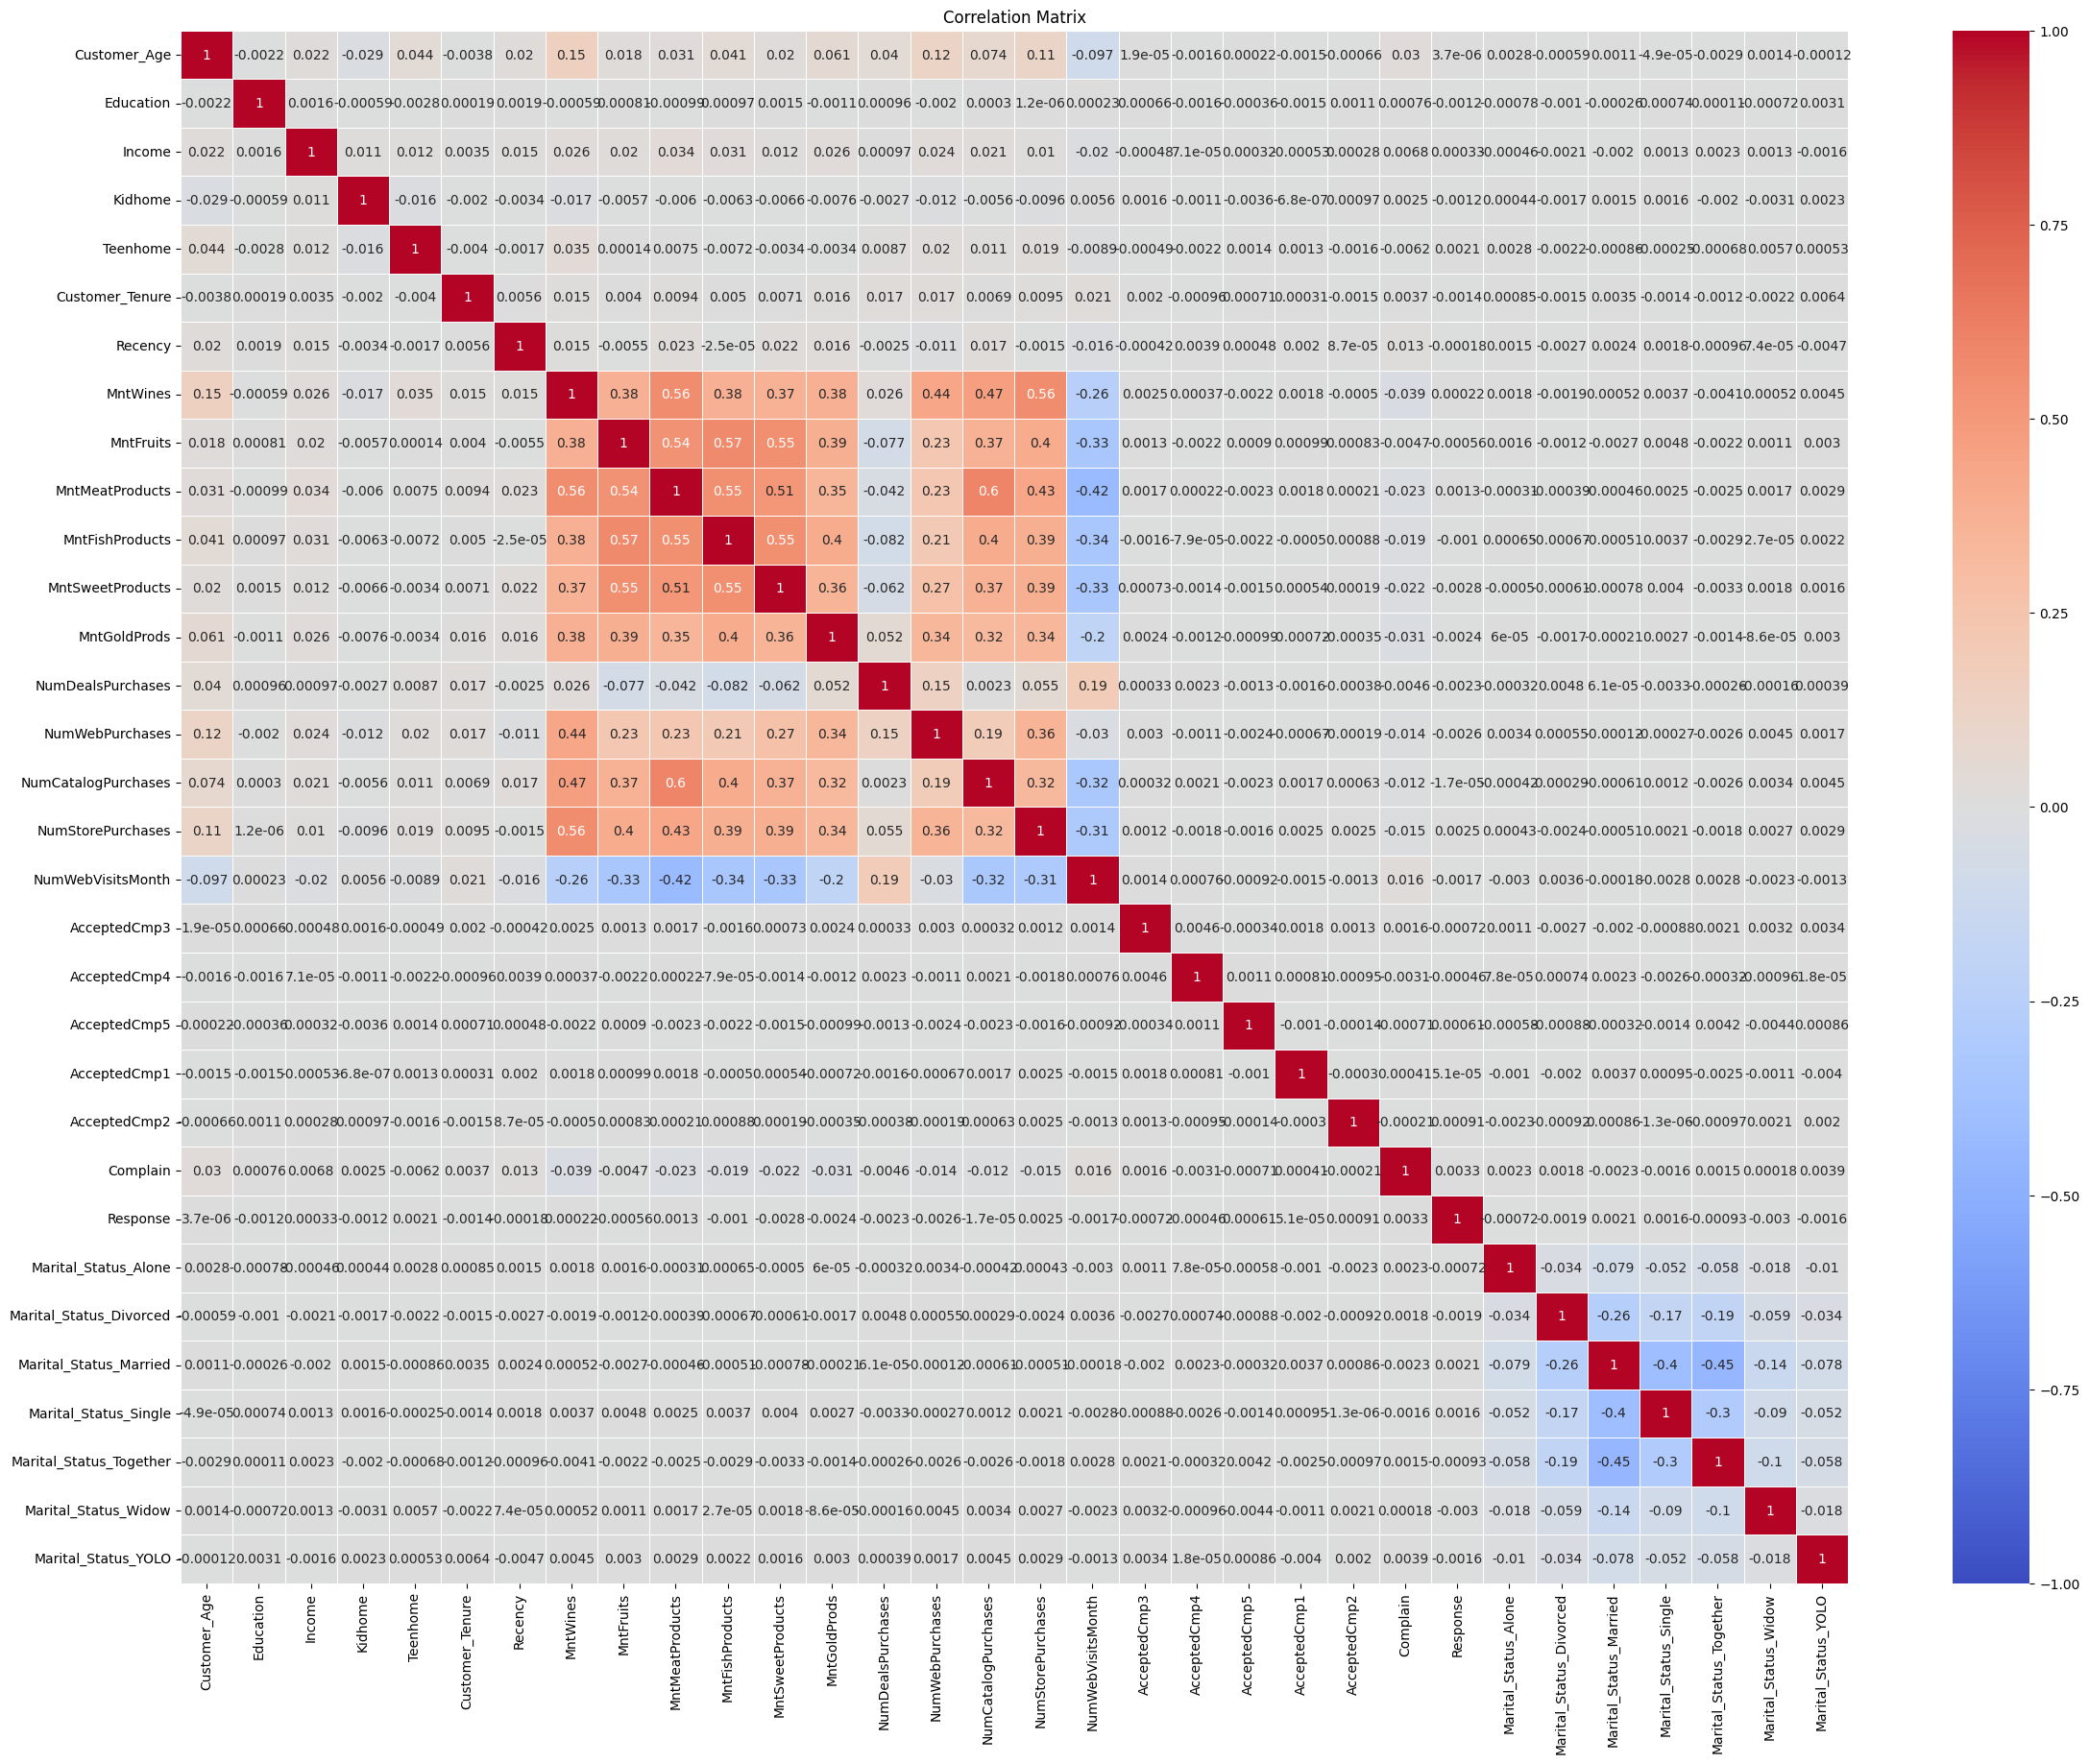

In [22]:
graphing_correlation_matrix(dataframe=X_train, zoom=7)

## Serving Features with Feast

In [23]:
"""
Simulating the Team 1 feature load
"""
ids_to_retrieve_features = writing_feature_table(dataframe=X_train, file_name="marketing_campaign_feature_table")

Feature Table in ../feast_service/fs_mle_02/feature_repo/data/marketing_campaign_feature_table.parquet


## Retrieving Features with Feast

In [24]:
"""
Simulating the Team 2 feature retrieve
"""
fs = FeatureStore(FEAST_REPOSITORY_PATH)
entity_df = pd.DataFrame.from_dict({ID_FEATURE: ids_to_retrieve_features, "event_timestamp": [pd.Timestamp.now()] * len(ids_to_retrieve_features)})
total_features = fs.get_historical_features(entity_df=entity_df, features=fs.get_feature_service("customer_marketing_campaign_feature_service")).to_df()

In [25]:
"""
Getting a sample to reduce the training time (for academic purposes only)
"""
X_train = total_features.sample(frac=0.05, random_state=SEED)

In [26]:
X_train

,customer_marketing_campaign_id,event_timestamp,created,Customer_Age,Education,Income,Kidhome,Teenhome,Customer_Tenure,Recency,...,AcceptedCmp2,Complain,Response,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
314923,b62e3970-8d84-40a9-a89b-2c00f03a55c4,2025-08-26 00:35:03.520368+00:00,2025-08-26 00:35:02.480946+00:00,-0.222222,0.0,-0.173230,1.0,0.0,-0.758639,-0.94,...,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
178293,b851db91-ec82-4065-88d9-d92e336f5387,2025-08-26 00:35:03.520368+00:00,2025-08-26 00:35:02.440360+00:00,1.111111,1.0,0.204662,1.0,0.0,0.097192,0.18,...,0.0,0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
315605,7e14a21c-481a-4c8d-b9cb-bdbe10755416,2025-08-26 00:35:03.520368+00:00,2025-08-26 00:35:02.481128+00:00,0.111111,1.0,0.034197,1.0,1.0,0.571274,-0.86,...,1.0,0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17654,a79f944d-2688-4029-a0be-c9349fdd33a6,2025-08-26 00:35:03.520368+00:00,2025-08-26 00:35:02.392048+00:00,0.111111,2.0,0.582588,0.0,1.0,0.313175,0.48,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
262691,37861c48-b11c-42a8-aeeb-4471796b26c4,2025-08-26 00:35:03.520368+00:00,2025-08-26 00:35:02.465610+00:00,0.000000,0.0,-0.211287,0.0,0.0,0.117711,-0.08,...,0.0,0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238190,89a843ac-9a6e-42f0-9446-3176ad60a81e,2025-08-26 00:35:03.520368+00:00,2025-08-26 00:35:02.458487+00:00,-0.055556,0.0,-0.476231,1.0,1.0,0.832073,0.84,...,0.0,0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
135435,e81cc935-24f3-40bd-95c9-52571c06d0ed,2025-08-26 00:35:03.520368+00:00,2025-08-26 00:35:02.428143+00:00,-0.722222,0.0,-0.391280,1.0,1.0,0.581533,0.22,...,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
316503,d7e6d339-7ade-42d3-954c-efeca02606ec,2025-08-26 00:35:03.520368+00:00,2025-08-26 00:35:02.481369+00:00,-0.777778,1.0,-0.288391,0.0,0.0,0.679806,-0.34,...,0.0,0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
216344,51f1fa33-c2c0-4a69-a7b2-54d11a3818da,2025-08-26 00:35:03.520368+00:00,2025-08-26 00:35:02.451723+00:00,-0.111111,2.0,1.225954,1.0,0.0,-0.971382,0.02,...,0.0,0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Saving artifacts

In [27]:
data = {
    "X_train": X_train.drop(columns=EXCLUDED_FEATURES)
}
joblib.dump(data, "../data/processed/processed_data.joblib")

['../data/processed/processed_data.joblib']